Loading data...
Data loaded. Shape: (7225, 48)
Number of trending videos (engagement > 0.15): 3011
Number of non-trending videos: 4214

--- Sentiment Analysis Review ---
Sentiment polarity feature already exists in the dataset.
Average sentiment polarity: 0.051
Sentiment distribution:
count    7225.000000
mean        0.050656
std         0.225172
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: sentiment_polarity, dtype: float64
Correlation between sentiment polarity and engagement rate: -0.004


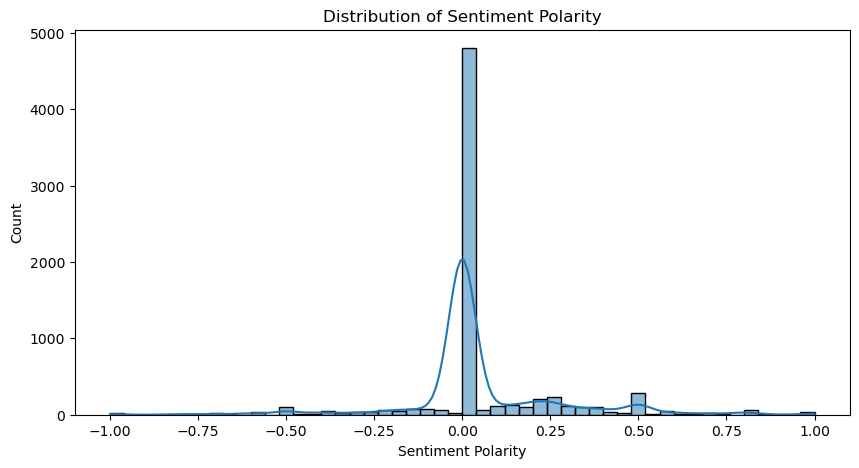

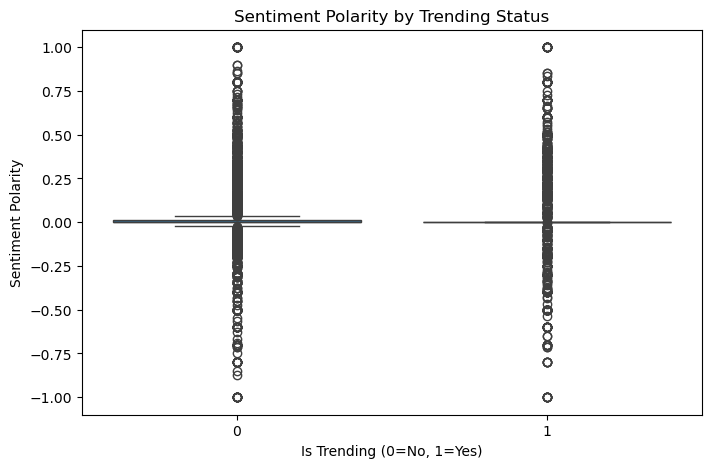


--- Performing Topic Modeling (LDA) ---
Vectorizing descriptions with CountVectorizer...
Document-Term Matrix shape: (7225, 2000)
Applying LDA with 5 topics...

Top 10 words per topic:
Topic #0: la que el en movie bride на не se por
Topic #1: fyp day time рекомендации trend funny lol summer did nfl
Topic #2: description fyp viral trending relatable fyp viral fypシ streameruniversity kaicenat real
Topic #3: fyp foryoupage foryou fypシ viral funny fyp foryou tiktok fyp foryoupage fypシviral
Topic #4: like im just dont love know new got think make


Distribution of videos per dominant topic:
dominant_topic
0    1250
1    1075
2    1517
3    1534
4    1849
Name: count, dtype: int64

Average engagement rate per dominant topic:
dominant_topic
0    0.124823
1    0.139167
2    0.164498
3    0.152738
4    0.135389
Name: engagement_rate_per_play, dtype: float64

Proportion of trending videos per dominant topic:
dominant_topic
0    0.328000
1    0.394419
2    0.515491
3    0.461538
4    0.371552
Na

C:\Users\eisra\AppData\Local\Temp\ipykernel_23336\3190410201.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dominant_topic', data=df, palette='viridis')


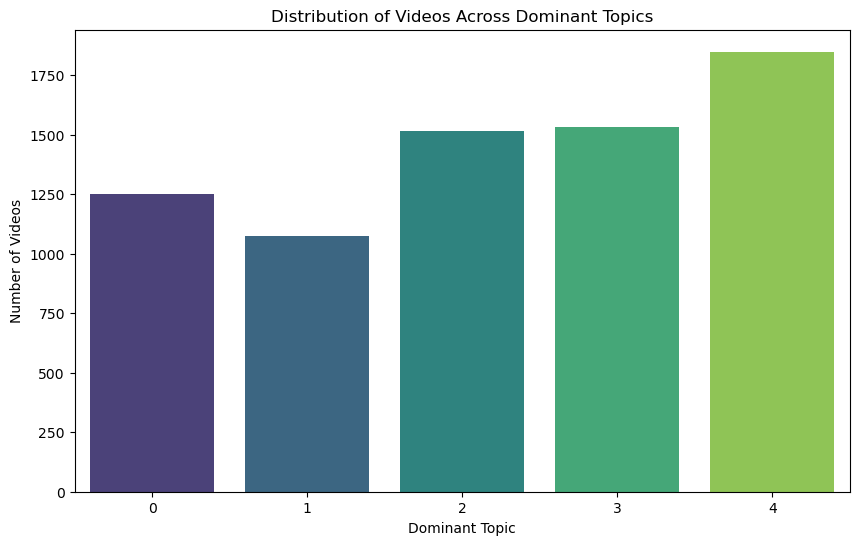

C:\Users\eisra\AppData\Local\Temp\ipykernel_23336\3190410201.py:142: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='dominant_topic', y='engagement_rate_per_play', data=df, palette='viridis', ci=None)
C:\Users\eisra\AppData\Local\Temp\ipykernel_23336\3190410201.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dominant_topic', y='engagement_rate_per_play', data=df, palette='viridis', ci=None)


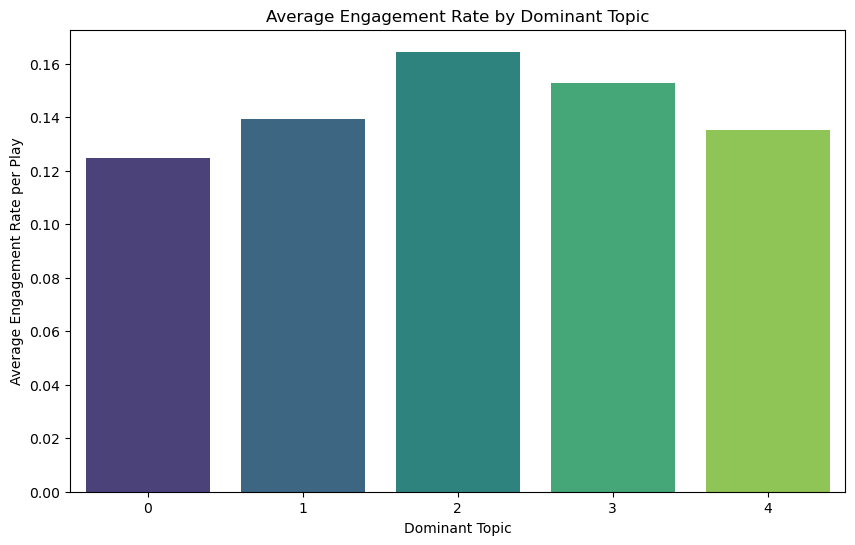


--- Performing Named Entity Recognition (NER) ---
Extracting entities from 7225 descriptions (this might take a while)...

Top 20 most frequent entities across all videos:
- un: 39
- chicago: 19
- meme: 14
- glowup: 12
- texas: 12
- mexico: 11
- mexican: 11
- netflix: 11
- india: 11
- la: 10
- california: 10
- юмор прикол: 10
- taylor: 10
- chaneloberlin королевыкрикасериалкоролевыкрика: 10
- america: 9
- florida: 9
- atlanta: 8
- american: 8
- kai cenat: 8
- us: 8

Top 20 most frequent entities in TRENDING videos:
- chicago: 8
- glowup: 7
- meme: 7
- netflix: 6
- atlanta: 5
- insta lanializa: 5
- christian: 5
- un: 4
- masala: 4
- dutch: 4
- hispanic: 4
- florida: 4
- hamilton: 4
- va: 4
- us: 4
- british: 3
- south korea: 3
- meme memecut: 3
- cia: 3
- mexico: 3

Top 20 most frequent entities in NON-TRENDING videos:
- un: 35
- chicago: 11
- texas: 11
- india: 10
- юмор прикол: 10
- chaneloberlin королевыкрикасериалкоролевыкрика: 10
- la: 9
- taylor: 9
- mexico: 8
- mexican: 8
- amer

In [4]:
# q5.ipynb

# =======================================================
# 5. Trend Identification Using NLP
# Goal: Use NLP to analyze TikTok video descriptions and hashtags to identify emerging trends.
# =======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy
from collections import Counter

# --- Configuration ---
DATA_PATH = 'tiktok_processed.csv' # Assuming this path is correct
N_TOPICS = 5 # Number of topics for LDA (can be tuned)
N_TOP_WORDS = 10 # Number of top words to show per topic
N_TOP_ENTITIES = 20 # Number of top entities to show

# ======================
# DATA LOADING & PREPARATION
# ======================
print("Loading data...")
df = pd.read_csv('data/processed/tiktok_processed.csv')

# Fill missing descriptions and convert to string for NLP processing
df['clean_description'] = df['clean_description'].fillna('').astype(str)

# Define binary target based on engagement_rate_per_play threshold (as per your latest model)
# This is useful for analyzing NLP features against trending status
df['is_trending'] = (df['engagement_rate_per_play'] > 0.15).astype(int)

print(f"Data loaded. Shape: {df.shape}")
print(f"Number of trending videos (engagement > 0.15): {df['is_trending'].sum()}")
print(f"Number of non-trending videos: {(df.shape[0] - df['is_trending'].sum())}")


# ======================
# SENTIMENT ANALYSIS REVIEW (already incorporated as a feature)
# ======================
print("\n--- Sentiment Analysis Review ---")
if 'sentiment_polarity' in df.columns:
    print("Sentiment polarity feature already exists in the dataset.")
    print(f"Average sentiment polarity: {df['sentiment_polarity'].mean():.3f}")
    print(f"Sentiment distribution:\n{df['sentiment_polarity'].describe()}")

    # Correlation with engagement (brief check)
    correlation = df['sentiment_polarity'].corr(df['engagement_rate_per_play'])
    print(f"Correlation between sentiment polarity and engagement rate: {correlation:.3f}")

    plt.figure(figsize=(10, 5))
    sns.histplot(df['sentiment_polarity'], bins=50, kde=True)
    plt.title('Distribution of Sentiment Polarity')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Count')
    plt.show()

    # Box plot of sentiment by trending status
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='is_trending', y='sentiment_polarity', data=df)
    plt.title('Sentiment Polarity by Trending Status')
    plt.xlabel('Is Trending (0=No, 1=Yes)')
    plt.ylabel('Sentiment Polarity')
    plt.show()

else:
    print("Sentiment polarity feature not found. Please ensure it's generated during preprocessing.")


# ======================
# TOPIC MODELING (Latent Dirichlet Allocation - LDA)
# Goal: Categorize video descriptions and detect emerging topics.
# ======================
print("\n--- Performing Topic Modeling (LDA) ---")

# Step 1: Vectorize text using CountVectorizer (often preferred for LDA)
print("Vectorizing descriptions with CountVectorizer...")
count_vectorizer = CountVectorizer(
    max_features=2000, # Increased features for more granular topics
    ngram_range=(1, 2), # Consider single words and two-word phrases
    stop_words='english',
    min_df=5, # Ignore terms that appear in less than 5 documents
    max_df=0.8 # Ignore terms that appear in more than 80% of documents (too common)
)

# Use the 'clean_description' column
dtm = count_vectorizer.fit_transform(df['clean_description'])
feature_names = count_vectorizer.get_feature_names_out()
print(f"Document-Term Matrix shape: {dtm.shape}")

# Step 2: Apply LDA
print(f"Applying LDA with {N_TOPICS} topics...")
lda = LatentDirichletAllocation(
    n_components=N_TOPICS,
    random_state=42,
    learning_method='batch', # 'batch' is generally more stable than 'online' for smaller datasets
    max_iter=50, # Increased iterations for better convergence
    n_jobs=-1 # Use all available CPU cores
)

lda.fit(dtm)

# Step 3: Display Top Words for Each Topic
print(f"\nTop {N_TOP_WORDS} words per topic:")
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

print_top_words(lda, feature_names, N_TOP_WORDS)

# Step 4: Assign Dominant Topic to Each Video
topic_distributions = lda.transform(dtm)
df['dominant_topic'] = topic_distributions.argmax(axis=1)

print("\nDistribution of videos per dominant topic:")
print(df['dominant_topic'].value_counts().sort_index())

# Step 5: Analyze Topics and their correlation with engagement/trending
print("\nAverage engagement rate per dominant topic:")
print(df.groupby('dominant_topic')['engagement_rate_per_play'].mean().sort_index())

print("\nProportion of trending videos per dominant topic:")
print(df.groupby('dominant_topic')['is_trending'].mean().sort_index())

# Visualize topic distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='dominant_topic', data=df, palette='viridis')
plt.title('Distribution of Videos Across Dominant Topics')
plt.xlabel('Dominant Topic')
plt.ylabel('Number of Videos')
plt.show()

# Visualize engagement by topic
plt.figure(figsize=(10, 6))
sns.barplot(x='dominant_topic', y='engagement_rate_per_play', data=df, palette='viridis', ci=None)
plt.title('Average Engagement Rate by Dominant Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Average Engagement Rate per Play')
plt.show()


# ======================
# NAMED ENTITY RECOGNITION (NER)
# Goal: Track specific names, brands, or events linked to trending content.
# ======================
print("\n--- Performing Named Entity Recognition (NER) ---")

# Load spaCy model (download if not present)
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model 'en_core_web_sm' (this may take a moment)...")
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")

# Function to extract entities from text
# Filter for relevant entity types (e.g., PERSON, ORG, GPE, EVENT, PRODUCT, WORK_OF_ART, LOC)
# You can customize these labels based on what you consider "brands" or "events"
# For a full list of spaCy entity types: https://spacy.io/api/annotation#named-entities
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text.lower() for ent in doc.ents if ent.label_ in [
        "PERSON", "ORG", "GPE", "EVENT", "PRODUCT", "WORK_OF_ART", "LOC", "NORP", "FAC" # Added more relevant types
    ]]
    return entities

# Apply NER to your clean descriptions
# This can be computationally intensive and may take a while for large datasets.
print(f"Extracting entities from {len(df)} descriptions (this might take a while)...")
# For very large datasets, consider processing in chunks or using dask.
df['extracted_entities'] = df['clean_description'].apply(extract_entities)

# Flatten the list of lists of entities and count them
all_entities = [entity for sublist in df['extracted_entities'] for entity in sublist]
entity_counts = Counter(all_entities)

print(f"\nTop {N_TOP_ENTITIES} most frequent entities across all videos:")
for entity, count in entity_counts.most_common(N_TOP_ENTITIES):
    print(f"- {entity}: {count}")

# Analyze entities in trending vs. non-trending videos
trending_entities = [entity for sublist in df[df['is_trending'] == 1]['extracted_entities'] for entity in sublist]
non_trending_entities = [entity for sublist in df[df['is_trending'] == 0]['extracted_entities'] for entity in sublist]

trending_entity_counts = Counter(trending_entities)
non_trending_entity_counts = Counter(non_trending_entities)

print(f"\nTop {N_TOP_ENTITIES} most frequent entities in TRENDING videos:")
for entity, count in trending_entity_counts.most_common(N_TOP_ENTITIES):
    print(f"- {entity}: {count}")

print(f"\nTop {N_TOP_ENTITIES} most frequent entities in NON-TRENDING videos:")
for entity, count in non_trending_entity_counts.most_common(N_TOP_ENTITIES):
    print(f"- {entity}: {count}")

# Suggestion for further analysis:
# You can compare the prevalence of certain entities in trending vs non-trending videos.
# For example, create a function to calculate "trending lift" for an entity:
# (proportion of entity in trending) / (proportion of entity in non-trending)
# Or, analyze how often an entity co-occurs with high engagement.

# Example: Check if a specific entity is more common in trending videos
# entity_to_check = "tiktok" # Example entity
# if entity_to_check in trending_entity_counts and entity_to_check in non_trending_entity_counts:
#     prop_trending = trending_entity_counts[entity_to_check] / sum(trending_entity_counts.values())
#     prop_non_trending = non_trending_entity_counts[entity_to_check] / sum(non_trending_entity_counts.values())
#     print(f"\nProportion of '{entity_to_check}' in trending: {prop_trending:.4f}")
#     print(f"Proportion of '{entity_to_check}' in non-trending: {prop_non_trending:.4f}")
#     if prop_non_trending > 0:
#         print(f"Lift for '{entity_to_check}': {prop_trending / prop_non_trending:.2f}")

print("\nNLP analysis complete. Explore the outputs for emerging trends!")

# --- Optional: Save the dataframe with new NLP features if needed for other notebooks ---
# df.to_csv('data/processed/tiktok_processed_with_nlp_features.csv', index=False)
# print("\nUpdated DataFrame with 'dominant_topic' and 'extracted_entities' saved.")